<a href="https://colab.research.google.com/github/VitoZac96/Thesis_public/blob/main/Baseline_CNN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from numpy import array
from numpy import hstack

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tensorflow import keras


from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping

from keras.layers import Dropout

#Logica del dataset: 
 

1.   Ogni colonna corrisponde a una stock.
2.   Ogni riga è il prezzo di chiusura osservato per quella stock.
3.   L'ultima colonna è il target da predire. (vedi funzione split_sequences)

In [147]:
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

In [150]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [151]:
# choose a number of time steps
n_steps = 5
# convert into input/output
X, y = split_sequences(dataset, n_steps)

print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])
 
n_features = X_train.shape[2]

(5, 5, 2) (5,)
[[10 15]
 [20 25]
 [30 35]
 [40 45]
 [50 55]] 105
[[20 25]
 [30 35]
 [40 45]
 [50 55]
 [60 65]] 125
[[30 35]
 [40 45]
 [50 55]
 [60 65]
 [70 75]] 145
[[40 45]
 [50 55]
 [60 65]
 [70 75]
 [80 85]] 165
[[50 55]
 [60 65]
 [70 75]
 [80 85]
 [90 95]] 185


#Stessa logica con i miei dati.

In [152]:
data = pd.read_excel("/content/data_to_train2.xlsx")
data = np.array(data.iloc[:,1:])

data = np.hstack((data,data[:,0].reshape((-1,1))))   #Metto nell'ultima colonna il prezzo target di apple

## Train test split
In questa fase il test set è usato per validation.

In [153]:
train = data[:-26,:]
test = data[-26:,:]

In [154]:
# choose a number of time steps
n_steps = 5
# convert into input/output
X_train, y_train = split_sequences(train, n_steps)
X_test, y_test = split_sequences(test, n_steps)
print(X_train.shape, y_train.shape)

# summarize the data
#for i in range(1):
#	print(X[i], y[i])
 
n_features = X_train.shape[2]

(985, 5, 133) (985,)


# CNN base

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation = "linear"))
model.compile(optimizer='adam', loss='mse')

#reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5, patience=50, min_lr=0.0001)
es = EarlyStopping(monitor='val_loss', mode='max', patience = 650, restore_best_weights=False)

# fit model: molte epochs e patience perché spesso migliora dopo molto
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_data=(X_test,y_test), callbacks=[es])

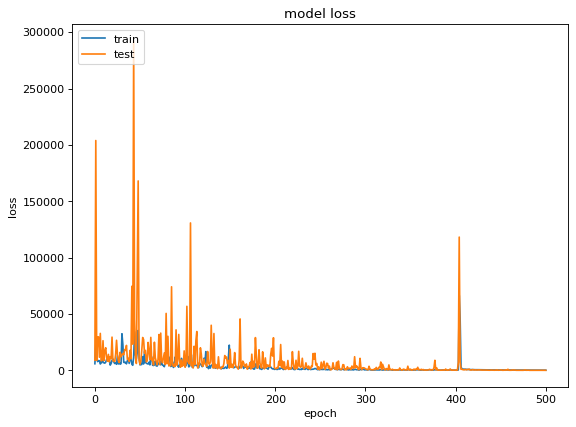

In [160]:
figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['loss'][100:])
plt.plot(history.history['val_loss'][100:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[130.6247 ]
 [135.18369]
 [140.13347]
 [138.63458]
 [135.6356 ]
 [133.55641]
 [133.0041 ]
 [135.36636]
 [141.83821]
 [142.40996]
 [136.15794]
 [128.46361]
 [134.23874]
 [132.92352]
 [133.42809]
 [133.34108]
 [131.42519]
 [130.38062]
 [120.7681 ]
 [124.5327 ]
 [121.44641]
 [121.27733]]


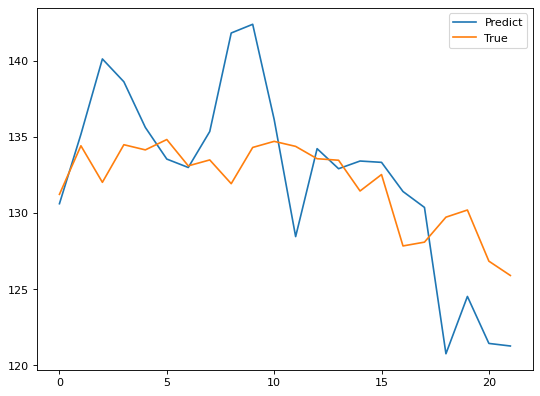

In [162]:
figure(figsize=(8, 6), dpi=80)

plt.plot(yhat, label = "Predict")
plt.plot(y_test, label = "True")
plt.legend()
plt.show()